# Feature Engineering
# Klassifikation
## Instanzbasierte Modelle
## Regelbasierte Modelle
## Mathematische Modelle
## Neuronale Netze

In [2]:
## preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

datapath = '../3_data'
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data, prep_demo_data
X_train, X_test, y_train, y_test = prep_data('bank_data_prep.csv', 'y', seed = 1234)
X_demo, y_demo = prep_demo_data('demo_data_class.csv', 'y')

### MLPClassifier
#### Theorie

kein Code zu diesem Kapitel

#### Praxis

In [6]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state = 1234)
model.fit(X_train, y_train) 
print(model.score(X_test, y_test))

0.6975965926376635


In [7]:
print(model.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1234, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


0 0.6975965926376635
1 0.7033769394584728
2 0.7052023121387283
3 0.7161545482202616
4 0.7280194706419227
5 0.7325829023425616
6 0.6759963492546395
7 0.6632187404928507
8 0.6410100395497415
9 0.6440523273501674


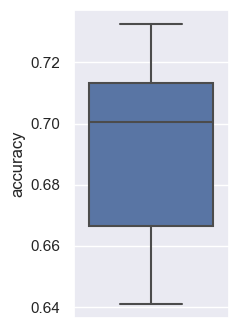

In [8]:
## investigate stability of MLPClassifier using different random seeds
params = range(0, 10)
scores = []

for param in params:
    model = MLPClassifier(random_state = 1234 + param)
    model.fit(X_train, y_train) 
    score = model.score(X_test, y_test)
    scores.append(score)
    print(param, score)

fig, ax = plt.subplots(figsize=(2,4))
sns.boxplot(y=scores)
ax.set(ylabel='accuracy');